In [3]:
#PRACTICE USING AADIL'S ARTICLE - TO BE IMPLEMENTED INTO THE MINST DATABASE FOR IDENTIFYING NUMBERS
#Establishing number of nodes in an array
n = [2,3,3,1]

In [4]:
import numpy as np
#Neural Network Layer Weights. If l is the current indexed layer, then the dimensions of the weight matrix should be n^[l]xn^[(l-1)] where n[l]
#are the features in that layer
W1 = np.random.randn(n[1], n[0])
W2 = np.random.randn(n[2], n[1])
W3 = np.random.randn(n[3], n[2])
#This creates a 2 dimensional array

#Neural Network bias weights. Biases are just an n[l] x 1 matrix since each node only has 1 bias.
b1 = np.random.randn(n[1], 1)
b2 = np.random.randn(n[2], 1)
b3 = np.random.randn(n[3], 1)

In [5]:
#print the values as a test

print("Weights for layer 1 shape:", W1.shape)
print("Weights for layer 2 shape:", W2.shape)
print("Weights for layer 3 shape:", W3.shape)
print("bias for layer 1 shape:", b1.shape)
print("bias for layer 2 shape:", b2.shape)
print("bias for layer 3 shape:", b3.shape)

Weights for layer 1 shape: (3, 2)
Weights for layer 2 shape: (3, 3)
Weights for layer 3 shape: (1, 3)
bias for layer 1 shape: (3, 1)
bias for layer 2 shape: (3, 1)
bias for layer 3 shape: (1, 1)


In [6]:
#Neural Network Training Data - Input
X = np.array([
    [150, 70],
    [254, 73],
    [312, 68],
    [120, 60],
    [154, 61],
    [212, 65],
    [216, 67],
    [145, 67],
    [184, 64],
    [130, 69]
])
print(X.shape)

#Vectorization
A0 = X.T

#confirm transpose
print(A0.shape)

(10, 2)
(2, 10)


In [7]:
#Neural Network - Labels

y =  np.array([
    0,  
    1,   
    1, 
    0,
    0,
    1,
    1,
    0,
    1,
    0
])

m = 10

#Must be in the form n[3]^m since there is only 1 binary result of cardiovacular disease for each piece of training data
Y = y.reshape(n[3], m)
Y.shape

(1, 10)

In [8]:
#define the activation function
def sigmoid(arr):
    return 1 / (1 + np.exp(-1 * arr))

In [14]:
#create a forward propogation function
#reversed weights and biases as parameters (list that starts with W1 and b1)
def forward_prop(layers, Weights_rev, biases_rev, A):
    """
    Rakshit's Notes:
    Note here that I add b which is a vector to a matrix. This is not mathematically defined but in Numpy we can "broadcast" the column values
     of b so that each entry of the b vector is repeatedly applied to the columns of the W @ A matrix
     
     You can read more by checking out this stack overflow question - https://stackoverflow.com/questions/15744402/numpy-matrix-plus-column-vector
     And the Numpy docs - https://numpy.org/doc/stable/user/basics.broadcasting.html
    """
    activated_out = []
    #Let's make this function scalable to l layers
    for l in layers:
        Z =  Weight_rev[l] @ A0 + biases_rev[l]
        A = sigmoid(Z)
        activated_out.append(A)
    activated_out.reverse()    
    return activated_out

In [10]:
A1 = forward_prop(W1, b1, A0)
#initial check for function working as intended
assert A1.shape == (n[1], m)

In [11]:
A2 = forward_prop(W2, b2, A1)
A3 = forward_prop(W3, b3, A2)
y_hat = A3

In [12]:
def cost(y_hat, y):
  """
  y_hat should be a n^L x m matrix
  y should be a n^L x m matrix
  """
  # 1. losses is a n^L x m
  """
  Rakshit's Notes:
  Bernoulli distribution based "binary cross-entropy loss" calculation. Essentially we use this since we use sigmoid (which outputs the probability of cardiovascular disease) as our 
  activation function and because the Neural Network returns a true or false answer, just like a bernoulli trial.
  
  Therefore, we can reduce the cost by maximizing the negative of the cost function. (ECE 204 application lol)
  
  Also note that this is the log of the intuitive Bernoulli PDF. This is done so that we only have to deal with a summation rather than a multiplication
  of the test samples. Since y_hat can only take values between 0 and 1 (as it is a probability), the below loss function has a minimum on this closed interval. 
  """
  losses = - ((y * np.log(y_hat)) + (1 - y)*np.log(1 - y_hat))

  """
  Rakshit's Notes:
  flattens multi-dimensional numpy array into a 1D shape array. Therefore, shape[0]
  returns only the ammount of elements in the array.
  
  This is a neat trick for when the sample size is not known or if it increases later during training.
  """
  m = y_hat.reshape(-1).shape[0]

  # 2. summing across axis = 1 means we sum across rows, 
  #   making this a n^L x 1 matrix
  summed_losses = (1 / m) * np.sum(losses, axis=1)

  # 3. unnecessary, but useful if working with more than one node
  #   in output layer
  return np.sum(summed_losses)

In [13]:
cost(y_hat,Y)

0.695108249978964

In [16]:
# Rakshit's notes - Deviating here from Aadil's code. 
# Rakshit's notes - I want to make this function scalable in case I want to add more hidden layers.
weights = [W3,W2,W1]
biases = [b3, b2, b1]
activated_out = [A3, A2, A1]
def back_prop(layers, activated_out, weights):
    dZ = 1/m (A-Y)
    dW_array = []
    db_array = []
    for x in range(layers):
        dW = dZ @ A2.T
        db = np.sum(dZ3, axis = 1, keepdims = True)
        dA = weights[x].T @ dZ
        dZ = dA*activated_out[x](1 - activated_out[x])
        dW_array.append(dW)
        db_array.append(db)
    return dW_array, db_array

In [64]:
"""
Rakshit's Notes:
Final setup - Putting everything together.
Here I create a train function similar to Aadil's Medium article
all the comments below are mine
"""
import numpy as np
#These variables would have to be used with the test function and the main program function
# So, it's better to make them global
#Node layout
n = [2,3,3,1]
#Neural Network Training Data - Input
X = np.array([
    [150, 70],
    [254, 73],
    [312, 68],
    [120, 60],
    [154, 61],
    [212, 65],
    [216, 67],
    [145, 67],
    [184, 64],
    [130, 69]
])

#Vectorization
A0 = X.T

#Neural Network - Labels

y =  np.array([
    0,  
    1,   
    1, 
    0,
    0,
    1,
    1,
    0,
    1,
    0
])

m = 10

#Must be in the form n[3]^m since there is only 1 binary result of cardiovacular disease for each piece of training data
Y = y.reshape(n[3], m)


weights = [] 
biases = []

#define the activation function
def sigmoid(arr):
    return 1 / (1 + np.exp(-1 * arr))

#create a forward propogation function
#reversed weights and biases as parameters (list that starts with W1 and b1)
def forward_prop(layers, Weights_rev, biases_rev):
    """
    Rakshit's Notes:
    Note here that I add b which is a vector to a matrix. This is not mathematically defined but in Numpy we can "broadcast" the column values
     of b so that each entry of the b vector is repeatedly applied to the columns of the W @ A matrix
     
     You can read more by checking out this stack overflow question - https://stackoverflow.com/questions/15744402/numpy-matrix-plus-column-vector
     And the Numpy docs - https://numpy.org/doc/stable/user/basics.broadcasting.html
    """
    #Let's make this function scalable to l layers
    A = A0
    activated_out = [A]
    for l in range(layers):
        Z =  Weights_rev[l] @ A + biases_rev[l]
        A = sigmoid(Z)
        activated_out.append(A)
        
    activated_out.reverse()    
    return activated_out

def cost(y_hat, y):
  """
  y_hat should be a n^L x m matrix
  y should be a n^L x m matrix
  """
  # 1. losses is a n^L x m
  """
  Rakshit's Notes:
  Bernoulli distribution based "binary cross-entropy loss" calculation. Essentially we use this since we use sigmoid (which outputs the probability of cardiovascular disease) as our 
  activation function and because the Neural Network returns a true or false answer, just like a bernoulli trial.
  
  Therefore, we can reduce the cost by maximizing the negative of the cost function. (ECE 204 application lol)
  
  Also note that this is the log of the intuitive Bernoulli PDF. This is done so that we only have to deal with a summation rather than a multiplication
  of the test samples. Since y_hat can only take values between 0 and 1 (as it is a probability), the below loss function has a minimum on this closed interval. 
  """
  losses = - ((y * np.log(y_hat)) + (1 - y)*np.log(1 - y_hat))

  """
  Rakshit's Notes:
  flattens multi-dimensional numpy array into a 1D shape array. Therefore, shape[0]
  returns only the ammount of elements in the array.
  
  This is a neat trick for when the sample size is not known or if it increases later during training.
  """
  m = y_hat.reshape(-1).shape[0]

  # 2. summing across axis = 1 means we sum across rows, 
  #   making this a n^L x 1 matrix
  summed_losses = (1 / m) * np.sum(losses, axis=1)

  # 3. unnecessary, but useful if working with more than one node
  #   in output layer
  return np.sum(summed_losses)

# Rakshit's notes - Deviating here from Aadil's code. 
# Rakshit's notes - I want to make this function scalable in case I want to add more hidden layers.
def back_prop(layers, activated_out, weights):
    dZ = (1/m)*(activated_out[0] - Y)
    dW_array = []
    db_array = []
    for l in range(layers):
        dW = dZ @ activated_out[l + 1].T
        db = np.sum(dZ, axis = 1, keepdims = True)
        dA = (weights[l].T) @ dZ
        dZ = dA*activated_out[l + 1]*(1 - activated_out[l + 1])
        dW_array.append(dW)
        db_array.append(db)
    return dW_array, db_array

def train(A0):
    layers = 3
    
    """
    Goal: To create weight matrix and bias matrix, indexed starting from the
    outer layers of the network.
    
    This means that in the for loop, dimensions of the weight matrices must be (layers - l) x (layers - l - 1)
    and for the bias matrices will be (layers - l) x 1
    
    ^ This looks complicated because we don't count the input layers as a layer for calculations
    """
    for l in range(layers):
        weights.append(np.random.randn(n[layers - l], n[layers - l - 1]))
        biases.append(np.random.randn(n[layers - l], 1))
        print ("bias when initialization for layer " + str(l) + " is :" + str(biases[l].shape))

    #Cost array for iterations
    costs = []
    # Using the same iterations as the Medium Article
    epochs = 10000
    #learning rate
    alpha = 0.1
    for i in range(epochs):
        #reverse bias and weight list and feed into the forward prop function
        activated_out = forward_prop(layers, weights[::-1], biases[::-1])
        costs.append(cost(activated_out[0], Y))
        dW_array, db_array = back_prop(layers, activated_out, weights)
        for index,x in enumerate(weights):
            weights[index] = weights[index] - alpha*dW_array[index]
            biases[index] = biases[index] - alpha*db_array[index]
    return costs

costs = train(A0)
print(costs)


bias when initialization for layer 0 is :(1, 1)
bias when initialization for layer 1 is :(3, 1)
bias when initialization for layer 2 is :(3, 1)
[0.6050122011307532, 0.6230892122130395, 0.5981248270132958, 0.5965068631551942, 0.5954700768535636, 0.6016491248235143, 0.6587013562830568, 0.650154237934367, 0.5897862377886599, 0.5885949560820101, 0.5895611980217731, 0.6095215426636404, 0.5843957782289818, 0.5857884880067806, 0.607708750386178, 0.5815422145874057, 0.596297569363846, 0.6201710886147037, 0.6809047196993797, 0.6799323506717316, 0.6790472871375408, 0.6782415180753993, 0.6775077419335437, 0.6768393081748916, 0.6762301628568386, 0.675674798111493, 0.6751682053652215, 0.674705832117949, 0.6742835420910034, 0.673897578546101, 0.6735445305761386, 0.6732213021698428, 0.6729250838561782, 0.6726533267400242, 0.6724037187473956, 0.672174162905856, 0.6719627574932467, 0.6717677778949277, 0.6715876600157781, 0.6714209850975331, 0.6712664657935038, 0.6711229333496994, 0.6709893257310957, 0.

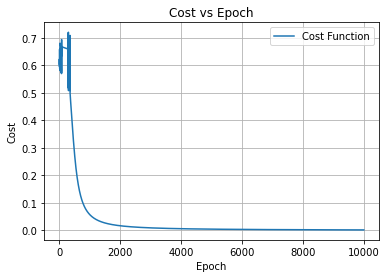

In [65]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(0, 10000))  # 1 to 100

# Plot
plt.plot(epochs, costs, label='Cost Function')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.grid(True)
plt.legend()
plt.show()